<a href="https://colab.research.google.com/github/Jalalbaim/Wrapper-methods-for-feature-selection/blob/main/wrapper_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wrapper Methods

In this project, we'll analyze data from a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas that asked people about their eating habits and weight. The data was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). Categorical variables were changed to numerical ones in order to facilitate analysis.

First, we'll fit a logistic regression model to try to predict whether survey respondents are obese based on their answers to questions in the survey. After that, we'll use three different wrapper methods to choose a smaller feature subset.

we'll use sequential forward selection, sequential backward floating selection, and recursive feature elimination. After implementing each wrapper method, we'll evaluate the model accuracy on the resulting smaller feature subsets and compare that with the model accuracy using all available features.

In [104]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

## Evaluating a Logistic Regression Model

The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Load the data
obesity = pd.read_csv("/content/drive/MyDrive/wrapper_methods_project/wrapper_methods_project/ObesityDataSet_raw_and_data_sinthetic.csv")

# Inspect the data
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [107]:
columns = list(obesity.columns)
columns

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [108]:
categ_col = []
for col in columns :
  col_ = obesity[col]
  if col_.dtypes == 'O' :
    categ_col.append(col)

categ_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [109]:
for col in categ_col :
  col_ = obesity[col]
  print(col_.value_counts())

Male      1068
Female    1043
Name: Gender, dtype: int64
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
yes    1866
no      245
Name: FAVC, dtype: int64
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64
no     2067
yes      44
Name: SMOKE, dtype: int64
no     2015
yes      96
Name: SCC, dtype: int64
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


## ENCODING DATA
***


In [110]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

In [111]:
num_data = {}
# deal with dictionnaries to create a new dataset which contains numerical values
'''
{ key : values ,
  .............  }
'''
for col in categ_col:
  categ_list = list(obesity[col])
  encoder = LabelEncoder()

  encoded_categories = encoder.fit_transform(categ_list)
  num_data [col] = encoded_categories

num_data

{'Gender': array([0, 0, 1, ..., 0, 0, 0]),
 'family_history_with_overweight': array([1, 1, 1, ..., 1, 1, 1]),
 'FAVC': array([0, 0, 0, ..., 1, 1, 1]),
 'CAEC': array([2, 2, 2, ..., 2, 2, 2]),
 'SMOKE': array([0, 1, 0, ..., 0, 0, 0]),
 'SCC': array([0, 1, 0, ..., 0, 0, 0]),
 'CALC': array([3, 2, 1, ..., 2, 2, 2]),
 'MTRANS': array([3, 3, 3, ..., 3, 3, 3]),
 'NObeyesdad': array([1, 1, 1, ..., 4, 4, 4])}

In [112]:
df = pd.DataFrame(num_data)
df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,1,0,2,0,0,3,3,1
1,0,1,0,2,1,1,2,3,1
2,1,1,0,2,0,0,1,3,1
3,1,0,0,2,0,0,1,4,5
4,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...
2106,0,1,1,2,0,0,2,3,4
2107,0,1,1,2,0,0,2,3,4
2108,0,1,1,2,0,0,2,3,4
2109,0,1,1,2,0,0,2,3,4


In [113]:
num_col = []
for col in columns :
  col_ = obesity[col]
  if col_.dtypes != 'O' :
    num_col.append(col)
num_col

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [114]:
for col in num_col:
  df[col] = obesity[col]
df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,2,0,0,3,3,1,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,0,1,0,2,1,1,2,3,1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,1,1,0,2,0,0,1,3,1,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,1,0,0,2,0,0,1,4,5,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,1,0,0,2,0,0,2,3,6,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,1,2,0,0,2,3,4,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,0,1,1,2,0,0,2,3,4,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,0,1,1,2,0,0,2,3,4,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,0,1,1,2,0,0,2,3,4,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


### Split the data

In [115]:
targ = "NObeyesdad"
target = df[targ]
features = df.drop(targ, axis=1)
features_named = features

In [116]:
target.head(10)

0    1
1    1
2    1
3    5
4    6
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int64

In [117]:
features.head(10)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,2,0,0,3,3,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,0,1,0,2,1,1,2,3,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,1,1,0,2,0,0,1,3,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,1,0,0,2,0,0,1,4,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,1,0,0,2,0,0,2,3,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0
5,1,0,1,2,0,0,2,0,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0
6,0,1,1,2,0,0,2,2,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0
7,1,0,0,2,0,0,2,3,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0
8,1,1,1,2,0,0,1,3,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0
9,1,1,1,2,0,0,3,3,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0


In [118]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features, dict)

scaled = pd.DataFrame(scaled)
scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,0.472291,-2.759769,0.300346,-0.145900,-0.218272,1.419172,0.503337,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-1.011914,0.472291,-2.759769,0.300346,6.853997,4.581439,-0.521160,0.503337,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,0.988227,0.472291,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,0.503337,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.988227,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,1.296280,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,0.988227,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [119]:
features = scaled
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,0.472291,-2.759769,0.300346,-0.145900,-0.218272,1.419172,0.503337,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-1.011914,0.472291,-2.759769,0.300346,6.853997,4.581439,-0.521160,0.503337,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,0.988227,0.472291,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,0.503337,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.988227,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,1.296280,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,0.988227,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    stratify=target,
    random_state=42,
    test_size=0.2 )

### Logistic regression model


In [122]:
lr = LogisticRegression(max_iter=1000)

### Fit the model


In [123]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Model accuracy


In [124]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
lr.score(X_test, y_test)

0.8699763593380615

In [125]:
y_pred = lr.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.84      0.71      0.77        58
           2       0.87      0.93      0.90        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.71      0.78      0.74        58
           6       0.80      0.71      0.75        58

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.87      0.87      0.87       423



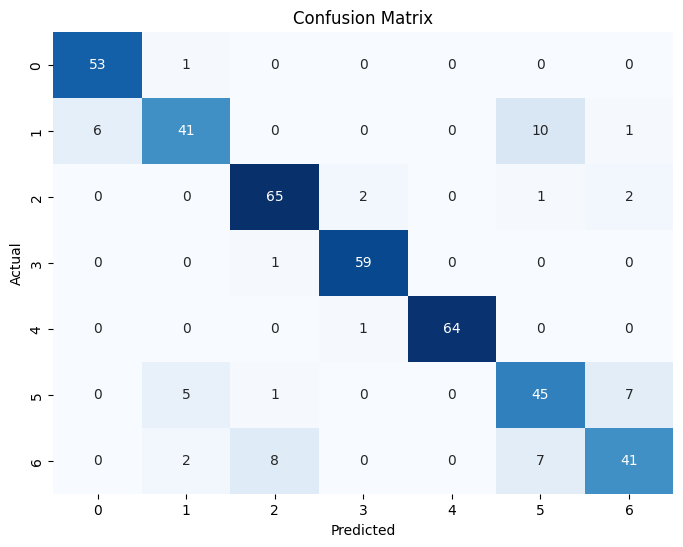

In [126]:
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Sequential Forward Selection



In [127]:
estimator = lr
sfs = SFS(estimator,
          k_features = 9,
          scoring = 'accuracy',
          cv = 0,
          forward = True,
          floating = False
          )

### Fit the model


In [128]:
sfs.fit(features, target)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

### Inspect the results

Now that you've run the sequential forward selection algorithm on the logistic regression model with `X` and `y` you can see what features were chosen and check the model accuracy on the smaller feature set. Print `sfs.subsets_[9]` to inspect the results of sequential forward selection.

In [129]:
print("Selected feature subsets:")
for subset_idx, subset in sfs.subsets_.items():
    print(f"Subset size: {len(subset['feature_idx'])}, Selected features: {subset['feature_idx']}")

selected_feature_indices = list(sfs.subsets_[9]['feature_idx'])
print("Selected feature indices:", selected_feature_indices)

Selected feature subsets:
Subset size: 1, Selected features: (10,)
Subset size: 2, Selected features: (9, 10)
Subset size: 3, Selected features: (0, 9, 10)
Subset size: 4, Selected features: (0, 9, 10, 11)
Subset size: 5, Selected features: (0, 9, 10, 11, 12)
Subset size: 6, Selected features: (0, 4, 9, 10, 11, 12)
Subset size: 7, Selected features: (0, 4, 6, 9, 10, 11, 12)
Subset size: 8, Selected features: (0, 4, 6, 7, 9, 10, 11, 12)
Subset size: 9, Selected features: (0, 4, 6, 7, 9, 10, 11, 12, 14)
Selected feature indices: [0, 4, 6, 7, 9, 10, 11, 12, 14]


### Chosen features and model accuracy


In [130]:
# Selected features
for i in selected_feature_indices:
  selected_feature_names = features_named.columns[i]
  print("Selected feature names:", selected_feature_names)

# Logistic Regression model using selected features
lr_selected = LogisticRegression()
lr_selected.fit(X_train.iloc[:, selected_feature_indices], y_train)

# New accuracy
y_pred_selected = lr_selected.predict(X_test.iloc[:, selected_feature_indices])
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy with selected features:", accuracy_selected)

Selected feature names: Gender
Selected feature names: SMOKE
Selected feature names: CALC
Selected feature names: MTRANS
Selected feature names: Height
Selected feature names: Weight
Selected feature names: FCVC
Selected feature names: NCP
Selected feature names: FAF
Accuracy with selected features: 0.9148936170212766


### Visualize model accuracy


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


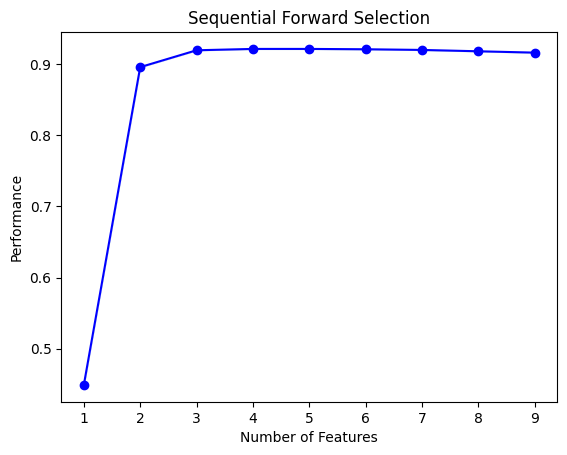

In [131]:
metric_dict = sfs.get_metric_dict()

fig = plot_sfs(metric_dict)
plt.title('Sequential Forward Selection')
plt.show()

## Sequential Backward Selection

Sequential forward selection was able to find a feature subset that performed marginally better than the full feature set. Let's use a different sequential method and see how it compares.

In [132]:
sbs = SFS(estimator,
          k_features=7,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

### Fit the model

Use the `.fit()` method on `sbs` to fit the model to `X` and `y`.

In [133]:
sbs.fit(features, target)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

### Inspect the results


In [134]:
print("Selected feature subsets:")
for subset_idx, subset in sbs.subsets_.items():
    print(f"Subset size: {len(subset['feature_idx'])}, Selected features: {subset['feature_idx']}")

Selected feature subsets:
Subset size: 16, Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
Subset size: 15, Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
Subset size: 14, Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14)
Subset size: 13, Selected features: (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14)
Subset size: 12, Selected features: (0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 14)
Subset size: 11, Selected features: (0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 14)
Subset size: 10, Selected features: (0, 1, 2, 4, 5, 6, 8, 9, 10, 11)
Subset size: 9, Selected features: (0, 1, 2, 5, 6, 8, 9, 10, 11)
Subset size: 8, Selected features: (0, 1, 2, 5, 6, 9, 10, 11)
Subset size: 7, Selected features: (0, 2, 5, 6, 9, 10, 11)


### Chosen features and model accuracy

Use the dictionary `sbs.subsets_[7]` to print a tuple of chosen feature names. Then use it to print the accuracy of the model after doing sequential backward selection. How does this compare to the model's accuracy on all available features?

In [135]:
selected_feature_indices = list(sbs.subsets_[7]['feature_idx'])
print("Selected feature indices:", selected_feature_indices)
# Selected features
for i in selected_feature_indices:
  selected_feature_names = features_named.columns[i]
  print("Selected feature names:", selected_feature_names)

# Logistic Regression model using selected features
lr_selected = LogisticRegression()
lr_selected.fit(X_train.iloc[:, selected_feature_indices], y_train)

# New accuracy
y_pred_selected = lr_selected.predict(X_test.iloc[:, selected_feature_indices])
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy with selected features:", accuracy_selected)

Selected feature indices: [0, 2, 5, 6, 9, 10, 11]
Selected feature names: Gender
Selected feature names: FAVC
Selected feature names: SCC
Selected feature names: CALC
Selected feature names: Height
Selected feature names: Weight
Selected feature names: FCVC
Accuracy with selected features: 0.91725768321513


### Visualize model accuracy



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


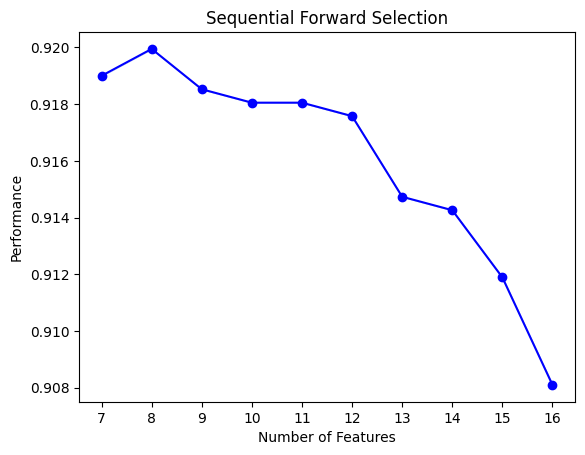

In [136]:
metric_dict = sbs.get_metric_dict()

fig = plot_sfs(metric_dict)
plt.title('Sequential Forward Selection')
plt.show()

## Recursive Feature Elimination

So far you've tried two different sequential feature selection methods. Let's try one more: recursive feature elimination. First you'll standardize the data, then you'll fit the RFE model and inspect the results.


In [137]:
ft_names = features_named.columns
ft_names

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight', 'FCVC', 'NCP',
       'CH2O', 'FAF', 'TUE'],
      dtype='object')

### Standardize the data


In [138]:
x = features
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,0.472291,-2.759769,0.300346,-0.145900,-0.218272,1.419172,0.503337,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-1.011914,0.472291,-2.759769,0.300346,6.853997,4.581439,-0.521160,0.503337,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,0.988227,0.472291,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,0.503337,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.988227,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,1.296280,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,0.988227,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,-1.011914,0.472291,0.362349,0.300346,-0.145900,-0.218272,-0.521160,0.503337,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


### Recursive feature elimination model

Create an `RFE()` object that selects `8` features. Be sure to set the `estimator` parameter to `lr`.

In [139]:
rfe = RFE(estimator, n_features_to_select=8)

### Fit the model

Fit the recursive feature elimination model to `X` and `y`.

In [140]:
rfe.fit(x, target)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

### Inspect chosen features


In [141]:
rfe_features = [f for (f, support) in zip(ft_names, rfe.support_) if support]
print(rfe_features)

['Gender', 'family_history_with_overweight', 'MTRANS', 'Age', 'Height', 'Weight', 'FCVC', 'NCP']


### Model accuracy


In [142]:
rfe.score(X_test, y_test)

0.9125295508274232

## Conclusion
***
```
            Wrapper method           accuracy
           ************************************
                 RFE         I         91.2%
                 SBS         I         91.7%
                 SFS         I         91.4%
```